<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLPByClass0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn pandas

import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=b14d43373af277e09be71202f8304f73051b62b3cccd49088fde9b48f3fbfd09
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
Mounted at /content/drive


In [2]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='macro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 5.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_0.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_0.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_0.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_0.csv")


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model_by_class0.hdf5"

In [5]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(100, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(80, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(60, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(40, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(20, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=1)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               8500      
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 60)                4860      
                                                                 
 dense_3 (Dense)             (None, 40)                2440      
                                                                 
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 24,721
Trainable params: 24,721
Non-traina

Streaming output truncated to the last 5000 lines.
21/23 [==========================>...] - ETA: 0s - loss: 0.1974 - accuracy: 0.8967
Epoch 3752: loss did not improve from 0.19233
23/23 [==============================] - 0s 18ms/step - loss: 0.1994 - accuracy: 0.8947 - val_loss: 4.1873 - val_accuracy: 0.5354
Epoch 3753/5000
21/23 [==========================>...] - ETA: 0s - loss: 0.2003 - accuracy: 0.8953
Epoch 3753: loss did not improve from 0.19233
23/23 [==============================] - 0s 16ms/step - loss: 0.2029 - accuracy: 0.8937 - val_loss: 4.1330 - val_accuracy: 0.5366
Epoch 3754/5000
21/23 [==========================>...] - ETA: 0s - loss: 0.2069 - accuracy: 0.8913
Epoch 3754: loss did not improve from 0.19233
23/23 [==============================] - 0s 17ms/step - loss: 0.2092 - accuracy: 0.8898 - val_loss: 4.0116 - val_accuracy: 0.5363
Epoch 3755/5000
22/23 [===========================>..] - ETA: 0s - loss: 0.2124 - accuracy: 0.8906
Epoch 3755: loss did not improve from 0.1

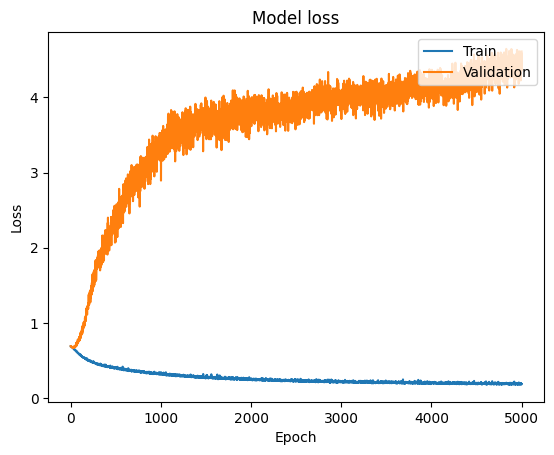



*********************************************




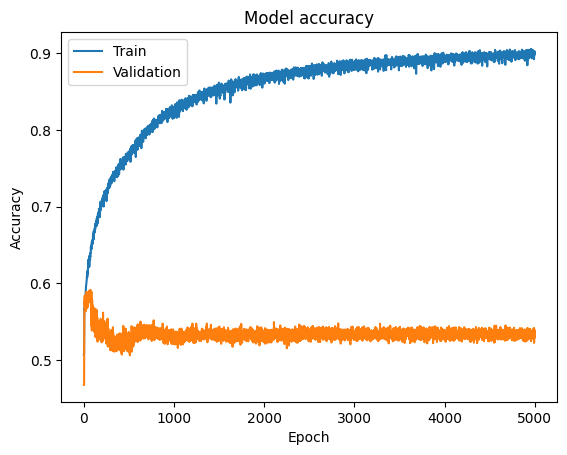



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 4.4704 - accuracy: 0.5140
[4.4704060554504395, 0.5140119791030884]
131/131 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

   class 1_2       0.52      0.52      0.52      2133
     class 0       0.50      0.51      0.51      2042

    accuracy                           0.51      4175
   macro avg       0.51      0.51      0.51      4175
weighted avg       0.51      0.51      0.51      4175



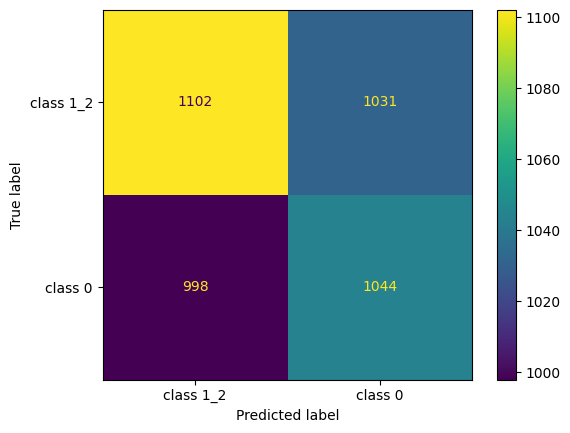



*********************************************
Train-set evaluate result:

534/534 [==============================] - 1s 2ms/step - loss: 1.0566 - accuracy: 0.8409
[1.0566432476043701, 0.8408531546592712]
534/534 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

   class 1_2       0.85      0.83      0.84      8533
     class 0       0.83      0.85      0.84      8533

    accuracy                           0.84     17066
   macro avg       0.84      0.84      0.84     17066
weighted avg       0.84      0.84      0.84     17066



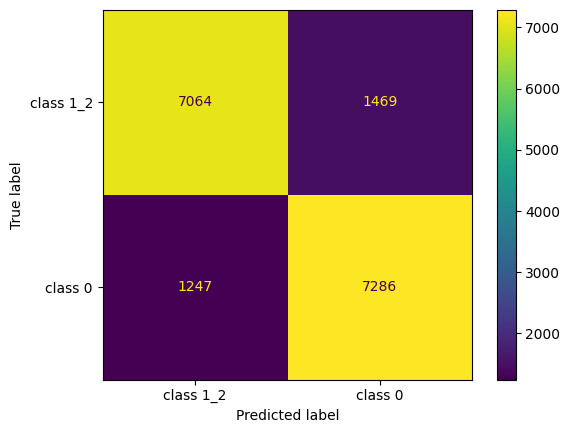

In [6]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 5000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 1_2', 'class 0']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int64)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int64)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [7]:
checkpoint.best

0.1775376945734024

Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 4.3956 - accuracy: 0.5071
[4.395630836486816, 0.5070658922195435]
131/131 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

   class 1_2       0.52      0.53      0.52      2133
     class 0       0.50      0.48      0.49      2042

    accuracy                           0.51      4175
   macro avg       0.51      0.51      0.51      4175
weighted avg       0.51      0.51      0.51      4175



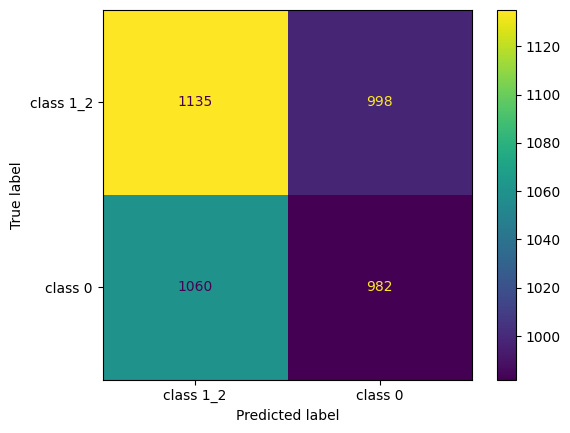



*********************************************
Train-set evaluate result:

534/534 [==============================] - 1s 2ms/step - loss: 1.0274 - accuracy: 0.8447
[1.0273754596710205, 0.8446618914604187]
534/534 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

   class 1_2       0.83      0.86      0.85      8533
     class 0       0.86      0.83      0.84      8533

    accuracy                           0.84     17066
   macro avg       0.85      0.84      0.84     17066
weighted avg       0.85      0.84      0.84     17066



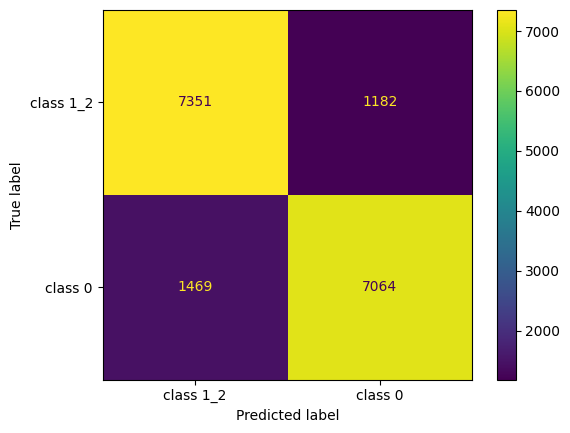

In [8]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 1_2', 'class 0']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int64)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int64)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [9]:
model.save("/content/drive/MyDrive/new_df/best_model_by_class0")